In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving height-weight.csv to height-weight (1).csv


In [ ]:
data=pd.read_csv('height-weight.csv')
data.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


we will not do feature engg and eda here as there is no null value

Text(0, 0.5, 'height')

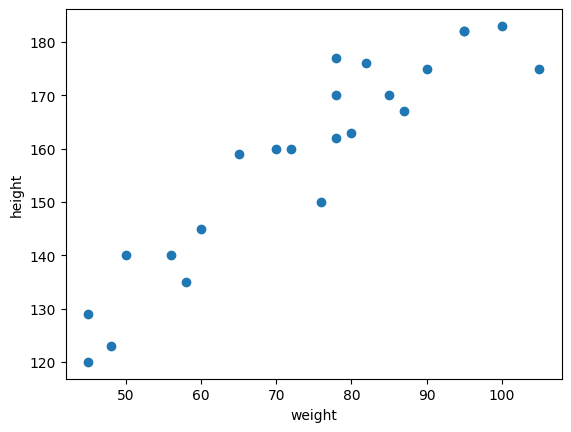

In [ ]:
plt.scatter(data['Weight'],data['Height'])
plt.xlabel('weight')
plt.ylabel('height')


plt show +ve correlation btw weight and height

In [ ]:
data.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


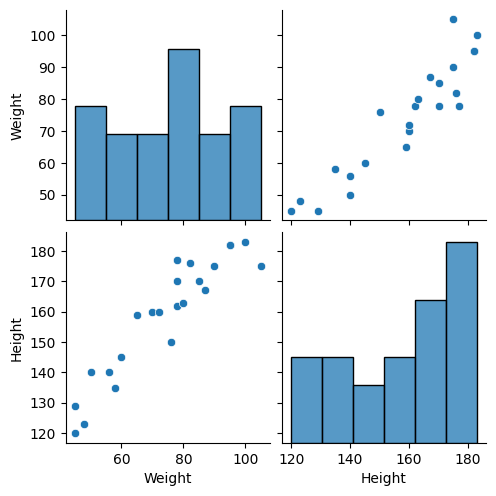

In [ ]:
import seaborn as sns
sns.pairplot(data)

linearly correlated linear regression will work

independent and dependant feature
indep feature should be a dataframe or 2d array
dep feature can be series

In [ ]:
X=data[['Weight']]
X.shape
Y=data['Height'] #depen can be in series or in 1 dim


In [ ]:
X_series=data['Weight']
X_series.shape

(23,)

train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [ ]:
x_test.shape

(6, 1)

In [ ]:
## standardization
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
x_train

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [ ]:
x_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [ ]:
##applingg simple linear regression
from sklearn.linear_model import LinearRegression
regression= LinearRegression(n_jobs=-1)

In [ ]:
regression.fit(x_test,y_test)

LinearRegression(n_jobs=-1)

In [ ]:
regression.coef_    #intercept here only one as only one independent feature

array([15.37777088])

In [ ]:
regression.intercept_

np.float64(158.99274400648042)

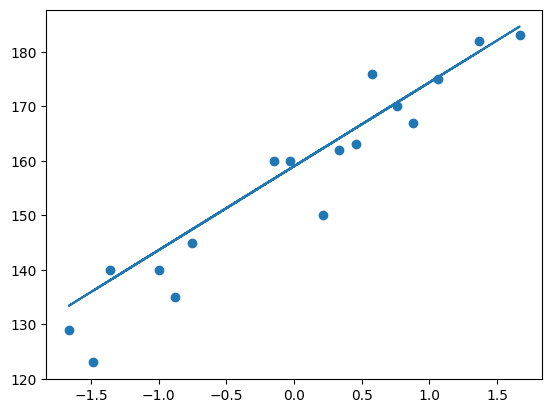

In [ ]:
## plt with respect to training
plt.scatter(x_train,y_train)
plt.plot(x_train,regression.predict(x_train))

In [ ]:
##prediction for test  data
y_pred=regression.predict(x_test)

In [ ]:
y_pred

array([164.14386171, 164.14386171, 133.40155289, 179.98080867,
       152.0332552 , 189.29665983])

In [ ]:
## performance matrice
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [ ]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

106.03056939154219
9.232737572028517
10.29711461485897


In [ ]:
## r2
score=r2_score(y_test,y_pred)
print(score)

0.7563293649476209


In [ ]:
adjusted_rscore=1-(1-score)*lenght

In [ ]:
## using ols
import statsmodels.api as sm

In [ ]:
model=sm.OLS(y_train,x_train).fit()

In [ ]:
prediction=model.predict(x_test)

In [ ]:
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [ ]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Fri, 27 Jun 2025   Prob (F-statistic):                       0.664
Time:                        09:54:56   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [ ]:
regression.predict(scaler.transform([[73]]))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([159.48593613])